### Data mining

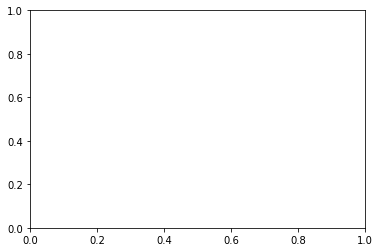

In [42]:
import pandas as pd
import thinkplot
import thinkstats2
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

import paygap

Read in data

In [67]:
df_raw = pd.read_csv('../Data/ipums_2017.csv')
df_raw.head()

,HHWT REGION STATEFIP COUNTYFIP METRO MET2013 CITY CITYERR PUMA CPUMA0010 HOMELAND CNTRY FARM NFAMS PERWT NCHILD NCHLT5 ELDCH YNGCH RELATE SEX AGE MARST YRMARR RACE HISPAN CITIZEN YRSUSA1 SPEAKENG SCHOOL EDUC GRADEATT SCHLTYPE DEGFIELD EMPSTAT EMPSTATD LABFORCE OCC2010 IND1990 CLASSWKR WKSWORK2 UHRSWORK WORKEDYR FTOTINC INCWAGE VETDISAB DIFFREM DIFFPHYS DIFFMOB DIFFCARE DIFFSENS DIFFEYE DIFFHEAR PWSTATE2 PWCOUNTY PWMET13 PWTYPE PWPUMA00 TRANWORK TRANTIME DEPARTS ARRIVES
0,1\t45\t32\t1\t0\t0\t0\t0\t0\t1800\t13\t1\t840\...
1,2\t136\t32\t1\t0\t0\t0\t0\t0\t2400\t16\t2\t840...
2,5\t19\t32\t1\t0\t0\t0\t0\t0\t2500\t16\t2\t840\...
3,10\t21\t32\t1\t0\t0\t0\t0\t0\t500\t2\t2\t840\t...
4,11\t21\t32\t1\t0\t0\t0\t0\t0\t500\t2\t2\t840\t...


In [9]:
work_force = df_raw[df_raw.EMPSTAT == 1] # Consider all employed people

Remove NaNs

In [10]:
work_force = work_force.dropna()
work_force.head()

,YEAR,DATANUM,SERIAL,CBSERIAL,HHWT,REGION,STATEICP,STATEFIP,COUNTYICP,COUNTYFIP,...,DIFFHEAR,PWSTATE2,PWCOUNTY,PWMET13,PWTYPE,PWPUMA00,TRANWORK,TRANTIME,DEPARTS,ARRIVES
1,2017,1,2,2017000000031,45,32,41,1,0,0,...,1,1,117,13820,5,1200,10,50,642,734
2,2017,1,3,2017000000061,136,32,41,1,0,0,...,1,13,0,0,5,1700,10,45,1805,1849
5,2017,1,4,2017000000158,19,32,41,1,0,0,...,1,1,0,0,9,2500,10,25,717,744
10,2017,1,5,2017000000159,21,32,41,1,0,0,...,1,1,0,0,9,290,10,60,602,704
11,2017,1,5,2017000000159,21,32,41,1,0,0,...,1,1,0,0,9,290,10,85,702,829


Recode `SEX` to be 0 for female and 1 for male.

In [11]:
work_force['SEX'].replace(2, 0, inplace=True)
work_force['SEX'].value_counts()

1    775971
0    713015
Name: SEX, dtype: int64

In [12]:
diff_vars = ['DIFFHEAR', 'DIFFPHYS', 'DIFFEYE', 'DIFFCARE', 'DIFFREM', 'DIFFMOB']

In [13]:
work_force['DIFFHEAR'].replace(1, 0, inplace=True)
work_force['DIFFPHYS'].replace(1, 0, inplace=True)
work_force['DIFFEYE'].replace(1, 0, inplace=True)
work_force['DIFFCARE'].replace(1, 0, inplace=True)
work_force['DIFFREM'].replace(1, 0, inplace=True)
work_force['DIFFMOB'].replace(1, 0, inplace=True)

In [14]:
work_force['DIFFHEAR'].replace(2, 1, inplace=True)
work_force['DIFFPHYS'].replace(2, 1, inplace=True)
work_force['DIFFEYE'].replace(2, 1, inplace=True)
work_force['DIFFCARE'].replace(2, 1, inplace=True)
work_force['DIFFREM'].replace(2, 1, inplace=True)
work_force['DIFFMOB'].replace(2, 1, inplace=True)

In [17]:
work_force = work_force.drop(["INCEARN", "INCTOT", "OCCSCORE", "SEI", "EDUCD", "DEGFIELDD", "OCC", "OCC1950", "BIRTHYR", "RELATED", "PERNUM", "FERTYR", "DEGFIELD2D", "DEGFIELD2", "HISPAND", "GRADEATTD", "CLASSWKRD", "MET2013ERR", "GQ", "RACED", "IND", "CITYPOP", 'YEAR', 'DATANUM', 'SERIAL', 'CBSERIAL', 'COUNTYICP','STATEICP'], axis=1)

In [16]:
work_force.columns

Index(['YEAR', 'DATANUM', 'SERIAL', 'CBSERIAL', 'HHWT', 'REGION', 'STATEICP',
       'STATEFIP', 'COUNTYICP', 'COUNTYFIP', 'METRO', 'MET2013', 'MET2013ERR',
       'CITY', 'CITYERR', 'CITYPOP', 'PUMA', 'CPUMA0010', 'HOMELAND', 'CNTRY',
       'GQ', 'FARM', 'NFAMS', 'PERNUM', 'PERWT', 'NCHILD', 'NCHLT5', 'ELDCH',
       'YNGCH', 'RELATE', 'RELATED', 'SEX', 'AGE', 'MARST', 'BIRTHYR',
       'YRMARR', 'FERTYR', 'RACE', 'RACED', 'HISPAN', 'HISPAND', 'CITIZEN',
       'YRSUSA1', 'SPEAKENG', 'SCHOOL', 'EDUC', 'EDUCD', 'GRADEATT',
       'GRADEATTD', 'SCHLTYPE', 'DEGFIELD', 'DEGFIELDD', 'DEGFIELD2',
       'DEGFIELD2D', 'EMPSTAT', 'EMPSTATD', 'LABFORCE', 'OCC', 'OCC1950',
       'OCC2010', 'IND', 'IND1990', 'CLASSWKR', 'CLASSWKRD', 'WKSWORK2',
       'UHRSWORK', 'WORKEDYR', 'INCTOT', 'FTOTINC', 'INCWAGE', 'INCEARN',
       'OCCSCORE', 'SEI', 'VETDISAB', 'DIFFREM', 'DIFFPHYS', 'DIFFMOB',
       'DIFFCARE', 'DIFFSENS', 'DIFFEYE', 'DIFFHEAR', 'PWSTATE2', 'PWCOUNTY',
       'PWMET13', 'PWTYPE', '

In [18]:
work_force.to_csv("ipums_2017.csv", sep='\t', encoding='utf-8')

Find hourly income using `UHRSWORK`, Usual hours worked per week, and `WKSWORK2`, Weeks worked last year (intervalled).

In [22]:
work_force = work_force[work_force['UHRSWORK'] >= 30] # Usual hours worked per week
work_force = work_force[work_force['WKSWORK2'] >= 3] # Weeks worked last year (level)

In [23]:
work_force['UHRSWORK'].replace([0], np.nan, inplace=True)
work_force['WKSWORK'] = work_force['WKSWORK2'].replace([0, 1, 2, 3, 4, 5, 6], [np.nan, 7, 20, 33, 43.5, 48.5, 51.5], inplace=False)
work_force['INCWAGE'].replace([0, 999999, 999998], np.nan, inplace=True)

In [24]:
work_force['HRLY_INCWAGE'] = work_force['INCWAGE']/(work_force['UHRSWORK'] * work_force['WKSWORK'])
work_force = work_force[work_force['HRLY_INCWAGE'] > 2] # Only consider those who earn > $2.0 hourly

In [ ]:
work_force = work_force.dropna()

In [25]:
work_force['INCWAGE'].head()

1     38500.0
2     72000.0
5     18000.0
10    65000.0
11    57000.0
Name: INCWAGE, dtype: float64

### Predictive powers

#### Find variables that impact income the most

In [26]:
t = []
for name in work_force.columns:
    try:
        if work_force[name].var() < 1e-7:
            continue
        
        formula = 'HRLY_INCWAGE ~ ' + name
        model = smf.ols(formula, data=work_force)
        if model.nobs < len(work_force)/2:
            print(model.nobs)
            continue
            
        results = model.fit()
    except (ValueError, TypeError):
        continue
        
    t.append((results.rsquared, name))

In [27]:
t.sort(reverse=True)
for r2, name in t[:-1]:
    print(name, r2)

HRLY_INCWAGE 1.0
INCWAGE 0.9261158455252794
EDUC 0.11627210702436874
DEGFIELD 0.0951023297375887
OCC2010 0.07549323581942147
MARST 0.03760606125612209
AGE 0.033228751535220535
YRMARR 0.029945658063642355
RELATE 0.020329427202418704
SEX 0.015630218428316134
PWTYPE 0.01251682703960788
MET2013 0.011530645300390496
PWMET13 0.009299384416518786
METRO 0.008828651596018644
UHRSWORK 0.00791208831388257
CLASSWKR 0.007129525815958382
ELDCH 0.006770865948471982
YNGCH 0.0065225018143909574
HISPAN 0.006148494141895777
SCHOOL 0.005137271811117117
NCHILD 0.005116032233183243
TRANTIME 0.004794247453699718
TRANWORK 0.004597630200731451
GRADEATT 0.004542730040963949
DEPARTS 0.00403277062846652
SCHLTYPE 0.003703717214444957
NFAMS 0.003657922426603011
PERWT 0.0030467392110153924
HOMELAND 0.0029909009135372644
ARRIVES 0.002971371832194536
WKSWORK 0.0024869686302712024
WKSWORK2 0.0024848584828224274
SPEAKENG 0.0024389720995459108
IND1990 0.0019898863965676084
DIFFREM 0.0013794232516962657
EMPSTATD 0.0012864

Variables that affect income the most are: education, field of degree, occupation, marital status, age, year of marriage and gender.

#### Income ~ variables

In [28]:
# Build formula
formula = 'HRLY_INCWAGE ~ '
ignores = ['HRLY_INCWAGE', 'SEX', 'UHRSWORK', 'WKSWORK2', 'WKSWORK', 'INCWAGE', 'INCEARN', 'INCTOT', 'OCCSCORE', 'SEI', 'SERIAL', 'CBSERIAL', 'GQ', 'PERNUM', 'PERWT', 'HHWT', 'RACE', 'HISPAN', 'EDUC', 'DEGFIELD2', 'EMPSTATD', 'HRLY_INCWAGE']
for col in work_force.columns:
    try:
        if col in ignores:
            continue

        formula += col + ' + '

    except (ValueError, TypeError):
        continue

In [29]:
formula = formula[:-3]
formula

'HRLY_INCWAGE ~ REGION + STATEFIP + COUNTYFIP + METRO + MET2013 + CITY + CITYERR + PUMA + CPUMA0010 + HOMELAND + CNTRY + FARM + NFAMS + NCHILD + NCHLT5 + ELDCH + YNGCH + RELATE + AGE + MARST + YRMARR + CITIZEN + YRSUSA1 + SPEAKENG + SCHOOL + GRADEATT + SCHLTYPE + DEGFIELD + EMPSTAT + LABFORCE + OCC2010 + IND1990 + CLASSWKR + WORKEDYR + FTOTINC + VETDISAB + DIFFREM + DIFFPHYS + DIFFMOB + DIFFCARE + DIFFSENS + DIFFEYE + DIFFHEAR + PWSTATE2 + PWCOUNTY + PWMET13 + PWTYPE + PWPUMA00 + TRANWORK + TRANTIME + DEPARTS + ARRIVES'

In [30]:
model = smf.ols(formula, data=work_force)
results = model.fit()
results.rsquared

0.19682939603279337

#### Income ~ variables + sex

In [31]:
formula_sex = formula + ' + SEX'

In [32]:
model = smf.ols(formula_sex, data=work_force)
results = model.fit()
results.rsquared

0.21588012228552778

Men earns $8 more hourly than women on average.

In [33]:
results.params['SEX']

8.288933169565901

### Analysis into some variables

As an example, we explore the relationship between age and mean hourly income. First, we group the respondents by age and find the mean income in each age group. Then, we run regression on the results and use the regression model to compute the male and female hourly income when controlling for age.

In [34]:
# Group by AGE and compute the mean income
grouped = work_force.groupby('AGE')
mean_income_by_group = grouped['HRLY_INCWAGE'].mean()

[Text(0, 0.5, 'Mean hourly wage'), Text(0.5, 0, 'Age')]

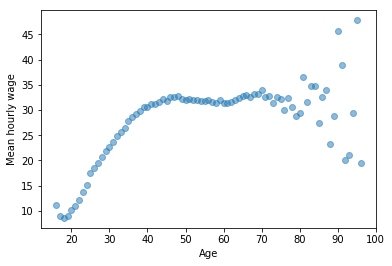

In [35]:
# Plot the result
fig, ax = plt.subplots()
ax.plot(mean_income_by_group, 'o', alpha=0.5)
ax.set(ylabel='Mean hourly wage', xlabel='Age')

Because this relationship, as well as other relationships we explore later, is non-linear, we use the quartic function to build our regression model.

In [36]:
# Build the regression model
col = 'AGE'
work_force_pow4 = work_force.copy()
work_force_pow4[col+'2'] = work_force[col]**2
work_force_pow4[col+'3'] = work_force[col]**3
work_force_pow4[col+'4'] = work_force[col]**4

formula = 'HRLY_INCWAGE ~ C(SEX) + AGE + AGE2 + AGE3 + AGE4'
model = smf.ols(formula, data=work_force_pow4)
results = model.fit()

In [37]:
# Create a new data frame and predict male and female income when controlling for age
df = pd.DataFrame()
df[col] = np.linspace(work_force_pow4[col].min(), work_force_pow4[col].max(), len(work_force_pow4[col]))
df[col+'2'] = df[col]**2
df[col+'3'] = df[col]**3
df[col+'4'] = df[col]**4

df['SEX'] = 1
pred_male = results.predict(df)

df['SEX'] = 0
pred_female = results.predict(df) 

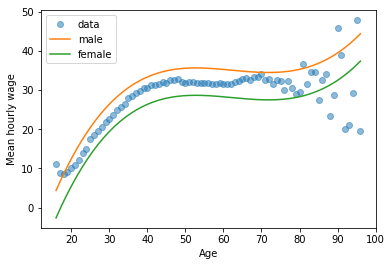

In [38]:
# Plot the result
fig, ax = plt.subplots()
ax.plot(mean_income_by_group, 'o', alpha=0.5, label='data')
ax.set(ylabel='Mean hourly wage', xlabel='Age')
ax.plot(df[col], pred_male, label='male')
ax.plot(df[col], pred_female, label='female')
ax.legend()

Female hourly income is lower than male hourly income for different ages. The pay gap is wider for middle-aged and older people.

Using the same approach, we look into other variables and pick some that seem to have interesting relationships.

In [39]:
variables = ['AGE', 'EDUC', 'ELDCH','NCHILD', 'UHRSWORK', 'WKSWORK', 'YRSUSA1', 'TRANTIME', 'DEPARTS']
variables_describe = ['Age', 'Education', 'Age of eldest child', 'Number of children', 'Usual hours worked per week', 'Weeks worked last year (approximate)', 'Years in the US', 'Travel time to work', 'Time of departure for work']

In [40]:
work_force_pow4 = work_force.copy()
for var in variables:
    for power in '234':
        work_force_pow4[var+power] = work_force_pow4[var]**int(power)

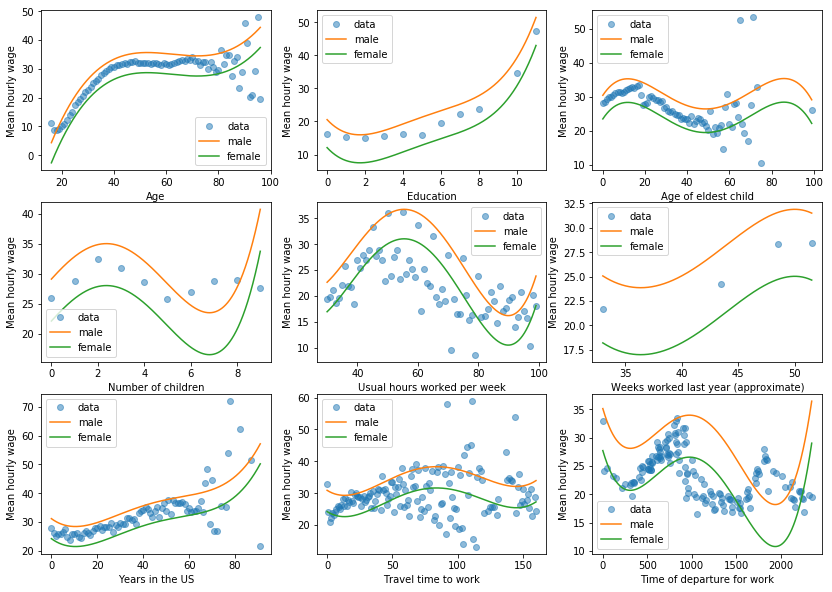

In [44]:
fig, axarr = plt.subplots(3, 3, figsize=(14,10))
for i in range(3):
    for j in range(3):
        paygap.PlotDataWithRegression(ax=axarr[i, j], work_force=work_force_pow4, col=variables[i*3+j], col_describe=variables_describe[i*3+j])

Analysissss

## People with Disabilities

Here are variables for people with disabilities:
- `DIFFHEAR`: 'Hearing difficulty'
- `DIFFPHYS`: 'Ambulatory difficulty'
- `DIFFEYE`: 'Vision difficulty'
- `DIFFCARE`: 'Self-care difficulty'
- `DIFFREM`: 'Cognitive difficulty'
- `DIFFMOB`: 'Independent living difficulty'

Response code:
- 1 = Does not have a disability
- 2 = Have a disability

In [90]:
diff_vars = ['DIFFHEAR', 'DIFFPHYS', 'DIFFEYE', 'DIFFCARE', 'DIFFREM', 'DIFFMOB']
diff_vars_describe = ['Hearing difficulty', 'Ambulatory difficulty', 'Vision difficulty', 'Self-care difficulty', 'Cognitive difficulty', 'Independent living difficulty']
is_disabled = (work_force["DIFFHEAR"] == 1) | (work_force["DIFFEYE"] == 1) | (work_force["DIFFPHYS"] == 1) | (work_force["DIFFCARE"] == 1) | (work_force["DIFFMOB"] == 1) | (work_force["DIFFREM"] == 1)

First, we create a DataFrame for those respondents who do not have any disability. We also include the `HRLY_INCWAGE` column in this DataFrame.

In [91]:
non_disabled = work_force[["HRLY_INCWAGE"] + diff_vars].copy()
non_disabled = non_disabled[~is_disabled]

non_disabled.head()

,HRLY_INCWAGE,DIFFHEAR,DIFFPHYS,DIFFEYE,DIFFCARE,DIFFREM,DIFFMOB
1,17.799353,0,0,0,0,0,0
2,33.287101,0,0,0,0,0,0
5,11.650485,0,0,0,0,0,0
10,21.035599,0,0,0,0,0,0
11,27.669903,0,0,0,0,0,0


Next, we create a DataFrame to store the hourly income, `HRLY_INCWAGE`, of non-disabled people.

In [92]:
diff_df = work_force[["SEX"]].copy() # SEX is a dummy variable to keep the index column
diff_df["No difficulties"] = non_disabled["HRLY_INCWAGE"]

Similarly, we also create a DataFrame for each group of disabled people and add them to `diff_df`.

In [93]:
for i, col in enumerate(diff_vars):
    disabled = work_force.copy()
    disabled = disabled[disabled[col] == 1]
    # Add a column to diff_df
    diff_df[diff_vars_describe[i]] = disabled["HRLY_INCWAGE"]
    
# Drop the dummy variable
diff_df.describe()

,SEX,No difficulties,Hearing difficulty,Ambulatory difficulty,Vision difficulty,Self-care difficulty,Cognitive difficulty,Independent living difficulty
count,1.158958e+06,1.096557e+06,21083.000000,20983.000000,13942.000000,4169.000000,14999.000000,8292.000000
mean,5.447652e-01,2.829058e+01,26.576556,22.716021,22.803967,22.536601,19.056181,19.989366
std,4.979923e-01,2.785562e+01,25.428707,22.604345,23.032487,27.578427,19.539960,23.675311
min,0.000000e+00,2.003390e+00,2.020202,2.019417,2.020202,2.019417,2.012357,2.012357
25%,0.000000e+00,1.359223e+01,13.106796,11.650485,11.165049,10.614887,9.708738,9.514563
50%,1.000000e+00,2.097087e+01,20.226537,17.475728,16.990291,16.396980,14.563107,14.563107
75%,1.000000e+00,3.378641e+01,31.553398,26.699029,27.184466,25.757576,22.863307,23.300971
max,1.000000e+00,7.171717e+02,488.888889,488.888889,368.582375,488.888889,436.363636,488.888889


Finally, we plot the result using Box Plot.

[Text(0.5, 0, 'Hourly income')]

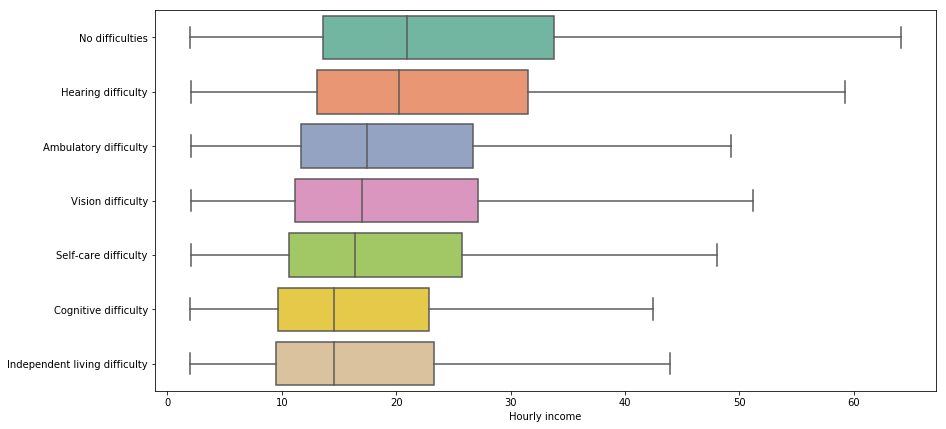

In [95]:
fig, ax = plt.subplots(figsize=(14,7))
ax = sns.boxplot(data=diff_df.drop(['SEX'], axis=1), orient="h", palette="Set2", showfliers=False)
ax.set(xlabel="Hourly income")

### Comparing incomes between men and women in non-disabled and disabled groups

We create a similar `non_disabled` DataFrame as above. This time, we also include the `SEX` column.

In [96]:
work_force["DIFFTOTAL"] = is_disabled
non_disabled = work_force[["HRLY_INCWAGE", "SEX", "DIFFTOTAL"]]
non_disabled = non_disabled[~is_disabled]
    
non_disabled.head()

,HRLY_INCWAGE,SEX,DIFFTOTAL
1,17.799353,0,False
2,33.287101,1,False
5,11.650485,0,False
10,21.035599,1,False
11,27.669903,0,False


Next, we select people with at least one disability and keep two columns, `HRLY_INCWAGE` and `SEX`.

In [97]:
disabled = work_force[["HRLY_INCWAGE", "SEX", "DIFFTOTAL"]]
disabled = disabled[is_disabled]
disabled.head()

,HRLY_INCWAGE,SEX,DIFFTOTAL
45,2.718447,1,True
109,7.216495,0,True
167,14.147018,0,True
168,11.067961,1,True
303,4.854369,1,True


First, let's look at the distribution of hourly income of the `non_disabled` group.

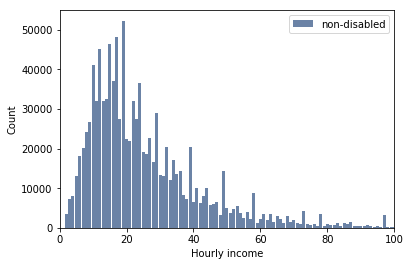

In [98]:
hist_non_disabled = thinkstats2.Hist(np.round(non_disabled["HRLY_INCWAGE"]), label='non-disabled')
thinkplot.hist(hist_non_disabled)
thinkplot.Config(xlim=(0, 100), xlabel="Hourly income", ylabel="Count")

The distribution is highly skews, so we will use median income to compute the pay gap in each group, which we will use to analyze the effect of disability on pay gap.

For `non_disabled` group, we can compute the difference between median hourly income of men and of women as follows:

In [99]:
male_median_non_disabled = non_disabled[non_disabled.SEX == 1]["HRLY_INCWAGE"].median()
female_median_non_disabled = non_disabled[non_disabled.SEX == 0]["HRLY_INCWAGE"].median()
pay_gap_non_disabled = male_median_non_disabled - female_median_non_disabled
print("Male median hourly income\t", male_median_non_disabled)
print("Female median hourly income\t", female_median_non_disabled)
print("Pay gap (Non-disabled)\t\t", pay_gap_non_disabled)

Male median hourly income	 22.94792586054722
Female median hourly income	 19.41747572815534
Pay gap (Non-disabled)		 3.5304501323918807


For `disabled` group:

In [100]:
male_median_disabled = disabled[disabled.SEX == 1]["HRLY_INCWAGE"].median()
female_median_disabled = disabled[disabled.SEX == 0]["HRLY_INCWAGE"].median()
pay_gap_disabled = male_median_disabled - female_median_disabled
print("Male median hourly income\t", male_median_disabled)
print("Female median hourly income\t", female_median_disabled)
print("Pay gap (Disabled)\t\t", pay_gap_disabled)

Male median hourly income	 19.41747572815534
Female median hourly income	 15.782828282828282
Pay gap (Disabled)		 3.6346474453270563


Analysissss

In [101]:
(pay_gap_non_disabled - pay_gap_disabled)/pay_gap_non_disabled

-0.029513888888888496

Compute CI.....

In [102]:
def computePayGap(df):
        male_median = df[df.SEX == 1]["HRLY_INCWAGE"].median()
        female_median = df[df.SEX == 0]["HRLY_INCWAGE"].median()
        return male_median - female_median
    
def computeStatistic(df):
    df = df[["HRLY_INCWAGE", "SEX", "DIFFTOTAL"]]
    is_disabled = df["DIFFTOTAL"]
    
    non_disabled = df[~is_disabled]
    disabled = df[is_disabled]

    pay_gap_non_disabled = computePayGap(non_disabled)
    pay_gap_disabled = computePayGap(disabled)

    return (pay_gap_non_disabled - pay_gap_disabled)/pay_gap_non_disabled
    
def computeCI(work_force, iter=201):
    stats = []
    
    for i in range(iter):
        df = thinkstats2.ResampleRows(work_force)
        stat = computeStatistic(df)
        stats.append(stat)
    
    cdf = thinkstats2.Cdf(stats)
    ci = cdf.Percentile(5), cdf.Percentile(95)
    return ci

In [103]:
computeCI(work_force)

(-0.0999999999999993, 0.037500000000000366)

Compute P value

In [104]:
class ProportionalTest():
    def __init__(self, data):
        self.data = data
        self.actual = self.TestStatistic(data)
        
    def PValue(self, iters=101):
        self.test_stats = [self.TestStatistic(self.RunModel()) for _ in range(iters)]
        count = sum(1 for x in self.test_stats if x >= self.actual)
        return 100 * count / iters
        
    def TestStatistic(self, data):
        return computeStatistic(data)

    def RunModel(self):
        # Copy the data frame
        shuffled_data = self.data.copy()
        # Permutate the rows of the DIFFTOTAL column on the copy
        shuffled_data["DIFFTOTAL"] = np.random.permutation(shuffled_data["DIFFTOTAL"]) 
        
        return shuffled_data

In [105]:
ProportionalTest(work_force).PValue()

65.34653465346534

The P value is very high, which shows that this effect is statistically insignificant.